In [2]:
# 1. Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# 2. Load Dataset
titanic_df = pd.read_csv("titanic.csv")

# 3. Basic Exploration
# Structure of dataset
titanic_df.info()

# Summary statistics
titanic_df.describe(include="all")

# First few rows
titanic_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# 4. Value Counts (Categorical)
print("Sex Distribution:\n", titanic_df["Sex"].value_counts())
print("\nEmbarked Distribution:\n", titanic_df["Embarked"].value_counts())
print("\nPassenger Class Distribution:\n", titanic_df["Pclass"].value_counts())

Sex Distribution:
 Sex
male      577
female    314
Name: count, dtype: int64

Embarked Distribution:
 Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

Passenger Class Distribution:
 Pclass
3    491
1    216
2    184
Name: count, dtype: int64


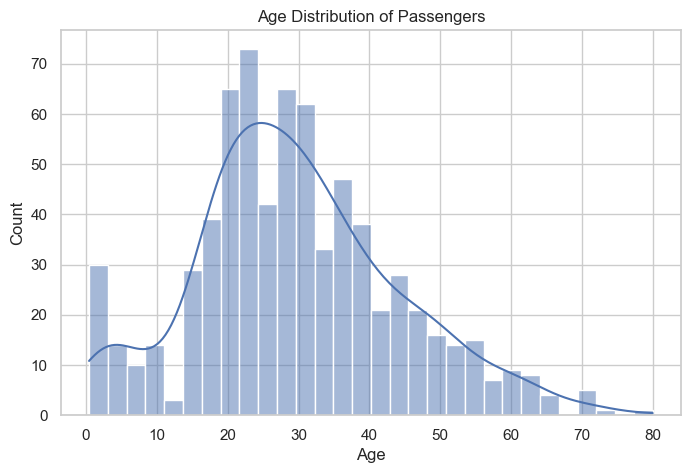

In [3]:
# 5. Visual Exploration
# Histogram of Age
plt.figure(figsize=(8,5))
sns.histplot(titanic_df["Age"].dropna(), bins=30, kde=True)
plt.title("Age Distribution of Passengers")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


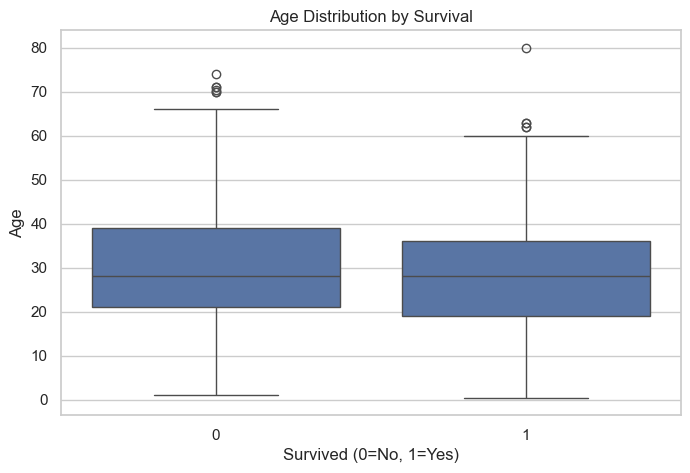

In [4]:
# Boxplot of Age by Survival
plt.figure(figsize=(8,5))
sns.boxplot(x="Survived", y="Age", data=titanic_df)
plt.title("Age Distribution by Survival")
plt.xlabel("Survived (0=No, 1=Yes)")
plt.ylabel("Age")
plt.show()

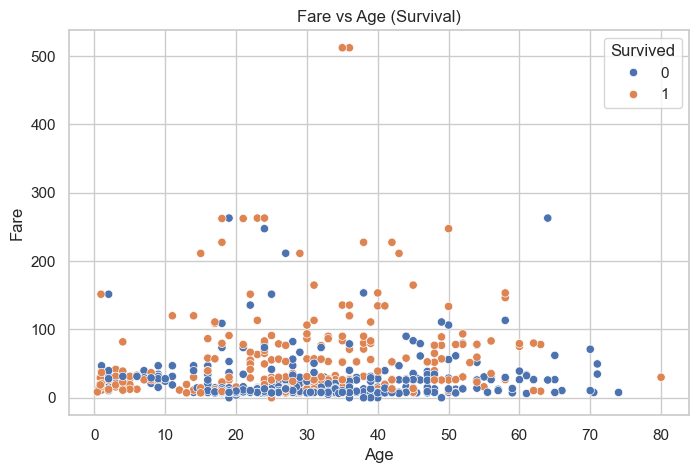

In [5]:
# Scatterplot: Age vs Fare colored by Survival
plt.figure(figsize=(8,5))
sns.scatterplot(x="Age", y="Fare", hue="Survived", data=titanic_df)
plt.title("Fare vs Age (Survival)")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.show()

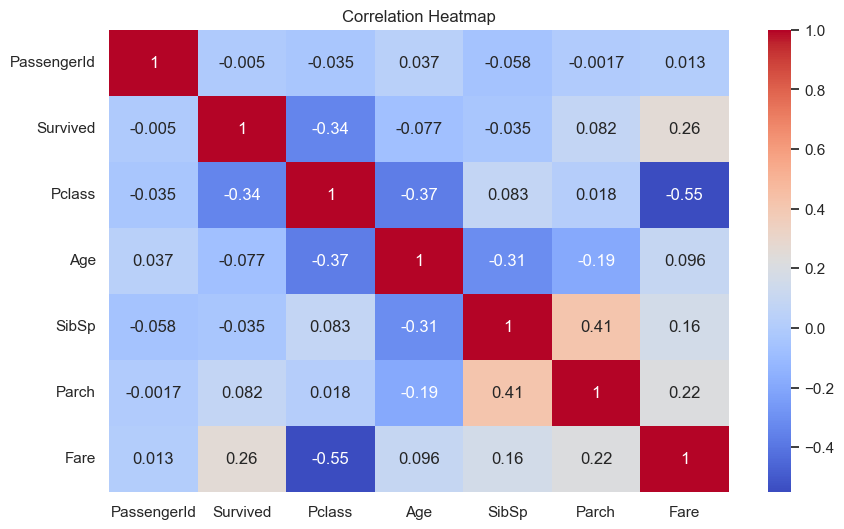

In [6]:
# Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(titanic_df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

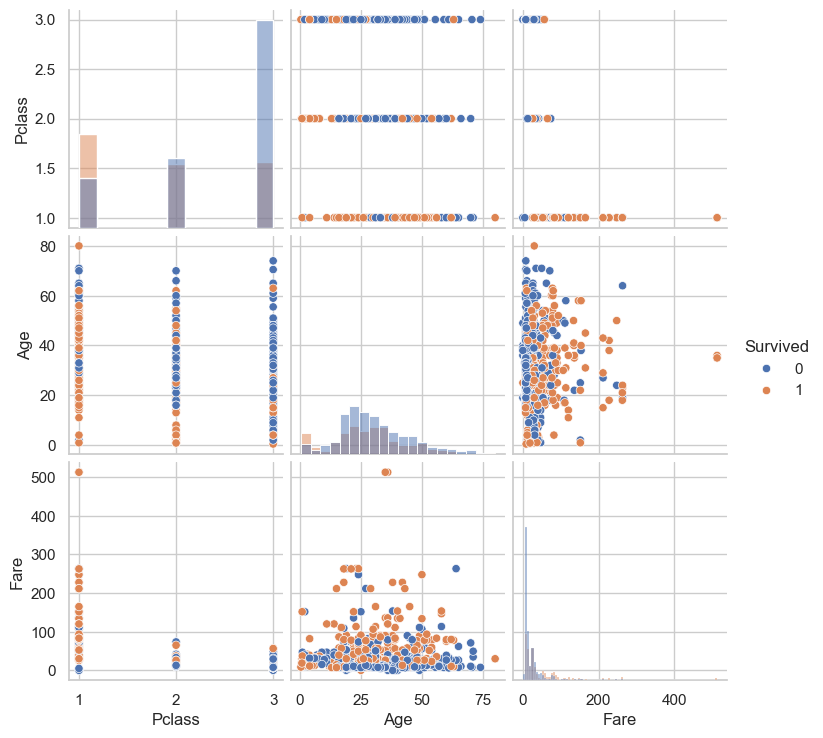

In [7]:
# Pairplot of key features
sns.pairplot(
    titanic_df[["Survived","Pclass","Age","Fare"]].dropna(),
    hue="Survived",
    diag_kind="hist"
)
plt.show()

In [8]:
# 6. Additional Survival Breakdown
# Survival by Gender
print("\nSurvival by Gender:")
print(titanic_df.groupby("Sex")["Survived"].mean())

# Survival by Passenger Class
print("\nSurvival by Class:")
print(titanic_df.groupby("Pclass")["Survived"].mean())

# Survival by Embarkation
print("\nSurvival by Embarked Port:")
print(titanic_df.groupby("Embarked")["Survived"].mean())


Survival by Gender:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

Survival by Class:
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

Survival by Embarked Port:
Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64
